In [ ]:
#モジュールをインポート(colab環境下)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [ ]:
df_1 = pd.read_csv('train.csv', encoding='SHIFT-JIS',index_col=0)
df_1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
index,,,,,,,,,,,,
0,22,Private,132618,Some-college,12,Never-married,Tech-support,Own-child,White,Female,United-States,0
1,22,Private,132655,Bachelors,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,Mexico,1
2,23,?,132674,HS-grad,8,Never-married,Other-service,Not-in-family,White,Female,United-States,0
3,36,Private,132642,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,United-States,1
4,49,Private,132646,Assoc-voc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,1


In [ ]:
df_2 = pd.read_csv('test.csv', encoding='SHIFT-JIS')
df_2.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,10200,30,Private,132646,HS-grad,12,Divorced,Prof-specialty,Unmarried,White,Male,Mexico
1,10201,30,Private,132626,HS-grad,4,Never-married,Sales,Wife,White,Female,United-States
2,10202,36,Private,132505,Bachelors,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,Mexico
3,10203,23,Private,132610,HS-grad,9,Divorced,?,Not-in-family,White,Female,United-States
4,10204,36,Private,132468,12th,9,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [ ]:
df_1.replace('?', np.nan, inplace = True)
df_1.isnull().sum()

age                 0
workclass         695
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        832
relationship        0
race                0
sex                 0
native-country      0
Y                   0
dtype: int64

In [ ]:
df_2.replace('?', np.nan, inplace = True)
df_2.isnull().sum()

id                  0
age                 0
workclass         450
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        556
relationship        0
race                0
sex                 0
native-country      0
dtype: int64

In [ ]:
#文字を数字に置き換え
df_r = df_1.replace({'Female':0,'Male':1})
df_r = df_r.replace({'United-States':0,'Mexico':1,'Black':2})
df_r = df_r.replace({'White':0,'Asian-Pac-Islander':1,'Philippines':2})
df_r = df_r.replace({'Tech-support':0,'Husband':1,'Not-in-family':2,'Unmarried':3,'Wife':4,'Other-relative':5})
df_r = df_r.replace({'Own-child':0,'Farming-fishing':1,'Other-service':2,'Sales':3,'Exec-managerial':4,'Protective-serv':5,
                     'Adm-clerical':6,'Prof-specialty':7,'Handlers-cleaners':8,'Craft-repair':9,'Machine-op-inspct':10,
                     'Transport-moving':11})
df_r = df_r.replace({'Never-married':0,'Married-civ-spouse':1,'Divorced':2,'Separated':3,'Widowed':4})
df_r = df_r.replace({'Some-college':0,'Bachelors':1,'HS-grad':2,'Assoc-voc':3,'12th':4,'10th':5,
                     'Masters':6,'5th-6th':7,'Assoc-acdm':8,'Prof-school':9,'7th-8th':10,
                     '11th':11,'9th':12,'1st-4th':13})
df_r = df_r.replace({'Private':0,'Local-gov':1,'Self-emp-inc':2,'Federal-gov':3,'Self-emp-not-inc':4,'State-gov':5})
df_r

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
index,,,,,,,,,,,,
0,22,0.0,132618,0,12,0,0.0,0,0,0,0,0
1,22,0.0,132655,1,9,1,1.0,1,0,1,1,1
2,23,NaN,132674,2,8,0,2.0,2,0,0,0,0
3,36,0.0,132642,1,13,1,3.0,1,0,1,0,1
4,49,0.0,132646,3,13,1,4.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,31,0.0,132650,1,9,2,9.0,5,0,0,1,0
10196,36,0.0,132590,2,9,1,4.0,3,0,1,1,0
10197,36,1.0,132498,1,13,1,NaN,1,2,1,0,0


In [ ]:
df_r2 = df_2.replace({'Female':0,'Male':1})
df_r2 = df_r2.replace({'United-States':0,'Mexico':1,'Black':2})
df_r2 = df_r2.replace({'White':0,'Asian-Pac-Islander':1,'Philippines':2})
df_r2 = df_r2.replace({'Tech-support':0,'Husband':1,'Not-in-family':2,'Unmarried':3,'Wife':4,'Other-relative':5})
df_r2 = df_r2.replace({'Own-child':0,'Farming-fishing':1,'Other-service':2,'Sales':3,'Exec-managerial':4,'Protective-serv':5,
                     'Adm-clerical':6,'Prof-specialty':7,'Handlers-cleaners':8,'Craft-repair':9,'Machine-op-inspct':10,
                     'Transport-moving':11})
df_r2 = df_r2.replace({'Never-married':0,'Married-civ-spouse':1,'Divorced':2,'Separated':3,'Widowed':4})
df_r2 = df_r2.replace({'Some-college':0,'Bachelors':1,'HS-grad':2,'Assoc-voc':3,'12th':4,'10th':5,
                     'Masters':6,'5th-6th':7,'Assoc-acdm':8,'Prof-school':9,'7th-8th':10,
                     '11th':11,'9th':12,'1st-4th':13})
df_r2 = df_r2.replace({'Private':0,'Local-gov':1,'Self-emp-inc':2,'Federal-gov':3,'Self-emp-not-inc':4,'State-gov':5})
df_r2

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,10200,30,0.0,132646,2,12,2,7.0,3,0,1,1
1,10201,30,0.0,132626,2,4,0,3.0,4,0,0,0
2,10202,36,0.0,132505,1,8,1,7.0,1,0,1,1
3,10203,23,0.0,132610,2,9,2,NaN,2,0,0,0
4,10204,36,0.0,132468,4,9,1,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,16995,31,0.0,132530,0,9,2,8.0,2,0,0,0
6796,16996,31,0.0,132634,1,6,0,11.0,2,1,1,0
6797,16997,31,0.0,132598,2,13,4,1.0,2,0,1,0
6798,16998,23,0.0,132573,0,8,2,NaN,2,2,0,0


In [ ]:
df_r.to_csv("train_replace.csv")
df_r2.to_csv("test_replace.csv")

In [ ]:
df_train = pd.read_csv('train_replace.csv', encoding='SHIFT-JIS',index_col=0)
df_test = pd.read_csv('test_replace.csv', encoding='SHIFT-JIS')
df_test.head()

,Unnamed: 0,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,0,10200,30,0.0,132646,2,12,2,7.0,3,0,1,1
1,1,10201,30,0.0,132626,2,4,0,3.0,4,0,0,0
2,2,10202,36,0.0,132505,1,8,1,7.0,1,0,1,1
3,3,10203,23,0.0,132610,2,9,2,NaN,2,0,0,0
4,4,10204,36,0.0,132468,4,9,1,3.0,1,0,1,0


In [ ]:
#1で補間
df_test = df_test.fillna(1)
df_train = df_train.fillna(1)

In [ ]:
df_test.isnull().sum()

Unnamed: 0        0
id                0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [ ]:
df_train = df_train.astype('int')
df_test = df_test.astype('int')

In [ ]:
df_f = df_train.drop('Y',axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             10200 non-null  int64
 1   workclass       10200 non-null  int64
 2   fnlwgt          10200 non-null  int64
 3   education       10200 non-null  int64
 4   education-num   10200 non-null  int64
 5   marital-status  10200 non-null  int64
 6   occupation      10200 non-null  int64
 7   relationship    10200 non-null  int64
 8   race            10200 non-null  int64
 9   sex             10200 non-null  int64
 10  native-country  10200 non-null  int64
 11  Y               10200 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


In [ ]:
from sklearn.decomposition import PCA
#主成分分析の実行
pca = PCA()
pca.fit(df_f)
# データを主成分空間に写像
feature = pca.transform(df_f)

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(df_f.columns))])

,0
PC1,9.999994e-01
PC2,3.972299e-07
PC3,5.335324e-08
PC4,4.791975e-08
PC5,3.714714e-08
PC6,1.438888e-08
PC7,8.538463e-09
PC8,4.343420e-09
PC9,2.264315e-09
PC10,1.057184e-09


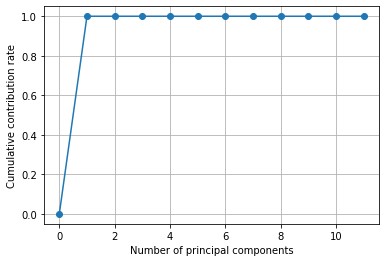

In [ ]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

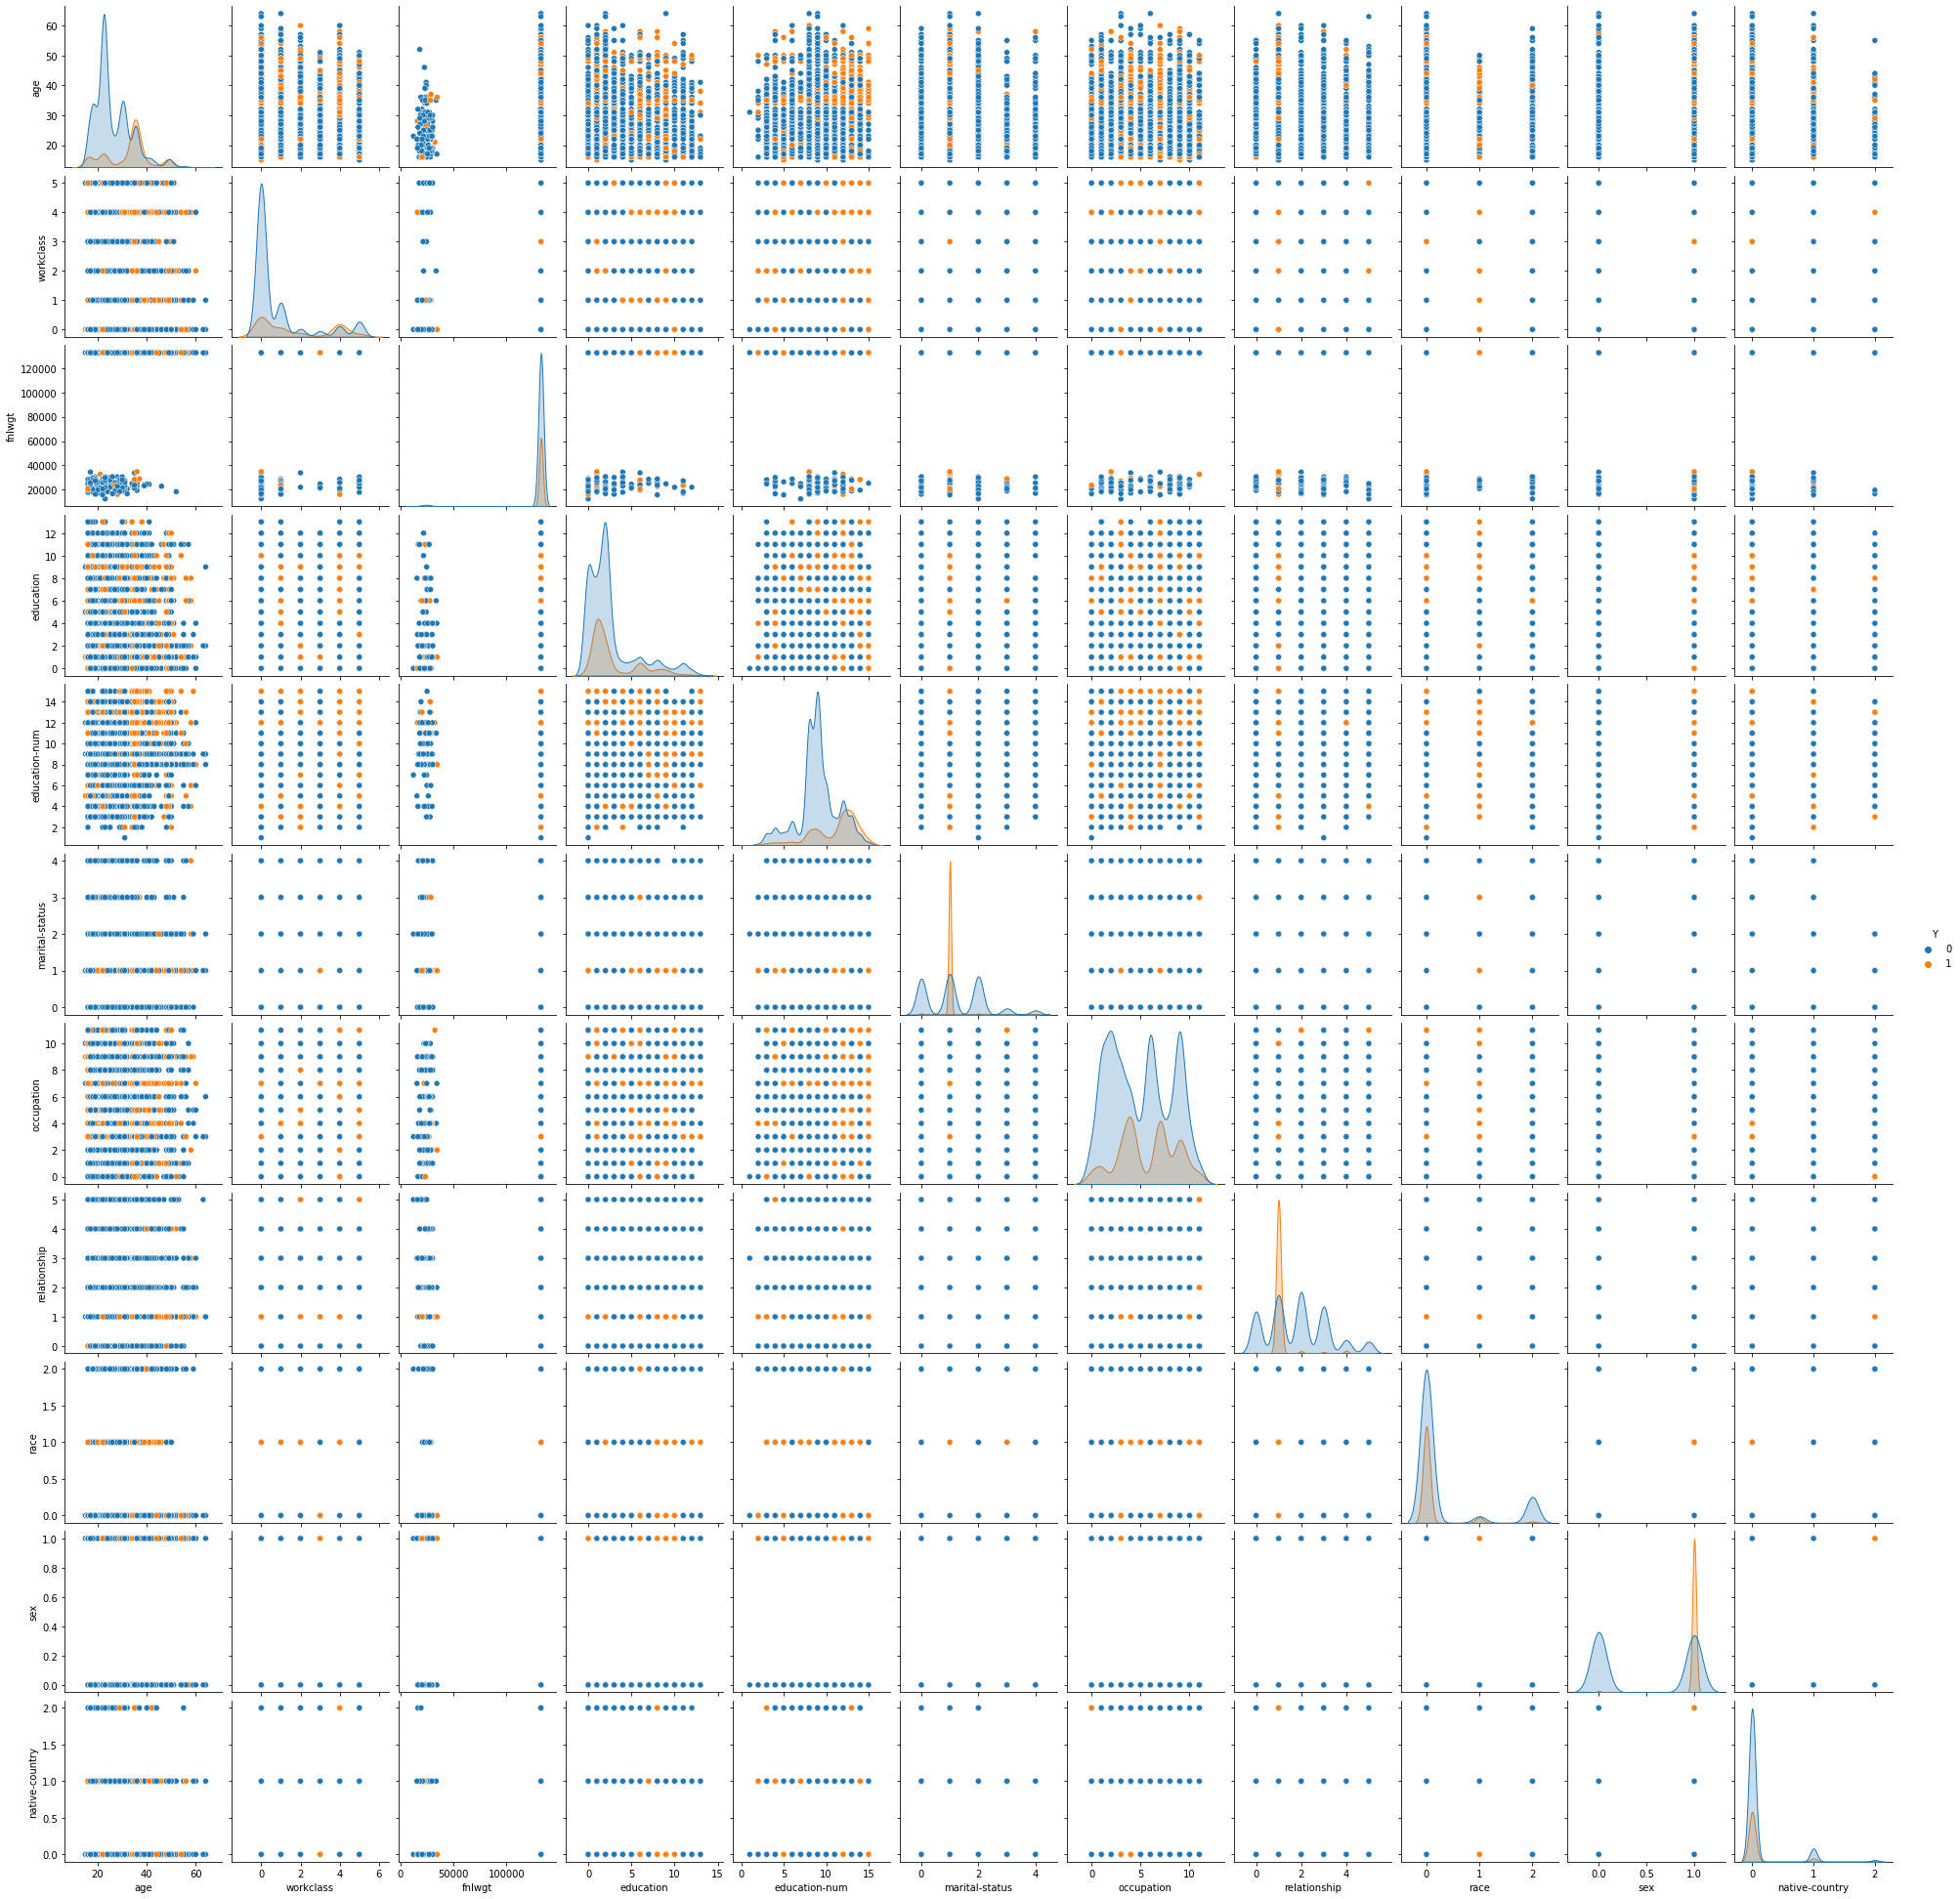

In [ ]:
sns.pairplot(df_train, hue='Y')

In [ ]:
pd.DataFrame(pca.components_, columns=df_f.columns[0:], index=["PC{}".format(x + 1) for x in range(len(df_f.columns))])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
PC1,-0.000025,-0.000002,-1.000000e+00,0.000001,-0.000004,9.992548e-07,-0.000003,0.000003,0.000002,-0.000002,2.904913e-07
PC2,0.997334,0.029025,-2.567195e-05,0.017115,0.054353,-2.562803e-03,0.027266,-0.014238,-0.005354,0.015880,1.490324e-03
PC3,-0.038335,0.077356,-2.680234e-06,0.135512,0.112367,-1.290789e-02,0.979785,-0.022497,-0.015564,0.025374,4.271681e-03
PC4,-0.018749,0.057173,1.560132e-06,0.984110,0.067912,-1.175716e-03,-0.150186,-0.016173,-0.006743,0.020475,3.553996e-03
PC5,0.053422,-0.107127,3.160927e-06,0.093972,-0.978626,2.374134e-02,0.112824,0.063313,0.019006,-0.038118,3.819428e-03
PC6,-0.021680,0.969628,-1.849621e-06,-0.060639,-0.134792,-6.117256e-02,-0.059976,-0.160600,-0.036349,0.054006,-1.163213e-02
PC7,0.006906,0.182688,2.521014e-06,0.004267,0.050734,1.753505e-01,0.005783,0.964020,0.035770,-0.050756,-3.763240e-03
PC8,-0.001029,0.035613,4.024760e-07,-0.002555,0.010361,9.796464e-01,0.006579,-0.189046,0.031598,-0.043870,-1.431779e-02
PC9,0.004128,0.037188,1.367130e-06,0.007241,0.018184,-4.804782e-02,0.011679,-0.042875,0.987914,-0.126225,-4.501350e-02
PC10,0.010704,0.042561,1.157247e-06,0.016756,0.029514,-5.231841e-02,0.013283,-0.047139,-0.138250,-0.975852,-1.427818e-01


In [ ]:
#訓練データで学習
X = df_train.drop(['Y'],axis=1)
#X = df_train[['workclass','relationship','marital-status']]
X  = (X - X.mean()) / X.std() #標準化

y = df_train['Y']

In [ ]:
#学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model = lgb.LGBMClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

# グリッドサーチを行うためのパラメーター
params = {
    'num_leaves': [3, 4, 5, 6, 7, 8, 9, 10],
    'reg_alpha': [0, 1, 2, 3, 4, 5,10, 100],
    'reg_lambda': [10, 15, 18, 20, 21, 22, 23, 25, 27, 29]
}

#グリッドサーチ実行
classifier = GridSearchCV(model, params, cv=3, n_jobs=-1)
classifier.fit(X_train, y_train)
print(classifier.best_score_)
print(classifier.best_params_)

0.8798319327731092
{'num_leaves': 4, 'reg_alpha': 0, 'reg_lambda': 20}


In [ ]:
model2 = lgb.LGBMClassifier(num_leaves= 4,reg_alpha= 0,reg_lambda= 20)
model2.fit(X_train, y_train)
pre = model2.predict(X_test)
accuracy_score(y_test, pre)

0.8761437908496732

In [ ]:
#テストデータ
X_valid = df_test.drop(['id'],axis=1)
X_valid = X_valid.iloc[:,1:]
X_valid  = (X_valid - X_valid.mean()) / X_valid.std() #標準化
X_valid


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,0.247552,-0.638719,0.121842,-0.198192,0.960742,0.928123,0.580249,1.077636,-0.406454,0.806467,2.807370
1,0.247552,-0.638719,0.120272,-0.198192,-2.141552,-1.273984,-0.722820,1.886279,-0.406454,-1.239793,-0.293688
2,0.976065,-0.638719,0.110777,-0.549982,-0.590405,-0.172930,0.580249,-0.539650,-0.406454,0.806467,2.807370
3,-0.602381,-0.638719,0.119017,-0.198192,-0.202619,0.928123,-1.374354,0.268993,-0.406454,-1.239793,-0.293688
4,0.976065,-0.638719,0.107873,0.505388,-0.202619,-0.172930,-0.722820,-0.539650,-0.406454,0.806467,-0.293688
...,...,...,...,...,...,...,...,...,...,...,...
6795,0.368971,-0.638719,0.112739,-0.901772,-0.202619,0.928123,0.906016,0.268993,-0.406454,-1.239793,-0.293688
6796,0.368971,-0.638719,0.120900,-0.549982,-1.365979,-1.273984,1.883318,0.268993,1.143678,0.806467,-0.293688
6797,0.368971,-0.638719,0.118075,-0.198192,1.348528,3.130230,-1.374354,0.268993,-0.406454,0.806467,-0.293688
6798,-0.602381,-0.638719,0.116113,-0.901772,-0.590405,0.928123,-1.374354,0.268993,2.693810,-1.239793,-0.293688


In [ ]:
predict = model2.predict(X_valid)
predict



array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#テストデータにpredictを追加
X_valid['Y'] = predict
X_valid

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,0.247552,-0.638719,0.121842,-0.198192,0.960742,0.928123,0.580249,1.077636,-0.406454,0.806467,2.807370,0
1,0.247552,-0.638719,0.120272,-0.198192,-2.141552,-1.273984,-0.722820,1.886279,-0.406454,-1.239793,-0.293688,0
2,0.976065,-0.638719,0.110777,-0.549982,-0.590405,-0.172930,0.580249,-0.539650,-0.406454,0.806467,2.807370,0
3,-0.602381,-0.638719,0.119017,-0.198192,-0.202619,0.928123,-1.374354,0.268993,-0.406454,-1.239793,-0.293688,0
4,0.976065,-0.638719,0.107873,0.505388,-0.202619,-0.172930,-0.722820,-0.539650,-0.406454,0.806467,-0.293688,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6795,0.368971,-0.638719,0.112739,-0.901772,-0.202619,0.928123,0.906016,0.268993,-0.406454,-1.239793,-0.293688,0
6796,0.368971,-0.638719,0.120900,-0.549982,-1.365979,-1.273984,1.883318,0.268993,1.143678,0.806467,-0.293688,0
6797,0.368971,-0.638719,0.118075,-0.198192,1.348528,3.130230,-1.374354,0.268993,-0.406454,0.806467,-0.293688,0
6798,-0.602381,-0.638719,0.116113,-0.901772,-0.590405,0.928123,-1.374354,0.268993,2.693810,-1.239793,-0.293688,0


In [ ]:
#提出するファイル用に、必要なデータのみを取り出す
s = df_test['id']

ss = pd.concat([s,X_valid['Y']],axis=1)

ss

,id,Y
0,10200,0
1,10201,0
2,10202,0
3,10203,0
4,10204,1
...,...,...
6795,16995,0
6796,16996,0
6797,16997,0
6798,16998,0


In [ ]:
#csvに変換(インデックスなし、ヘッダーなし)
ss.to_csv('sub.csv', index = False, header = None)